    Import the necessary libraries:


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


    Load the image using the Pillow library:

In [40]:
img = Image.open('sample.png').convert('L')


    Convert the image to a NumPy array:

In [41]:
img_array = np.array(img)


    Apply Fourier Transformation to the image array:

In [60]:
f = np.fft.fft2(img_array)

# Shift the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

    Convert the magnitude spectrum array (obtained from Fourier Transformation) to image format:
    

In [71]:
magnitude_spectrum = 20*np.log(np.abs(fshift))

    Display the original image and magnitude spectrum image using Matplotlib:

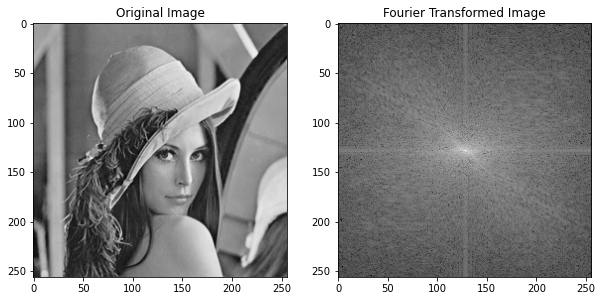

In [72]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transformed Image')
plt.show()


    Creating circular High Pass & Low Pass Filter mask & apply them to FFT image

In [45]:
#define raduius
radius = 40
rows, cols = img_array.shape

# Compute the center row and column indices
center_row, center_col = rows // 2, cols // 2

# Create a grid of row and column indices
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Compute the distance of each pixel from the center
r = np.sqrt((x - center_col) ** 2 + (y - center_row) ** 2)

        Circular high pass filtering

In [65]:
# Create a circular high pass filter
mask = np.ones((rows, cols),np.uint8)

mask[r <= radius] = 0

# Apply the circular high pass filter on the magnitude spectrum
fshift_hp = fshift * mask

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum_hp = 20*np.log(np.abs(fshift_hp))

/tmp/ipykernel_25236/3013286068.py:10: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_hp = 20*np.log(np.abs(fshift_hp))


        Circular low pass filtering

In [66]:
# Create a circular low pass filter
mask = np.zeros((rows, cols), dtype=np.uint8)

mask[r <= radius] = 1

# Apply the circular low pass filter on the magnitude spectrum
fshift_lp = fshift * mask

# Compute the magnitude spectrum of the filtered image
magnitude_spectrum_lp = 20*np.log(np.abs(fshift_lp))

/tmp/ipykernel_25236/4009293267.py:10: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_lp = 20*np.log(np.abs(fshift_lp))


    Plotting magnitude spectrum with high pass filter and low pass filter

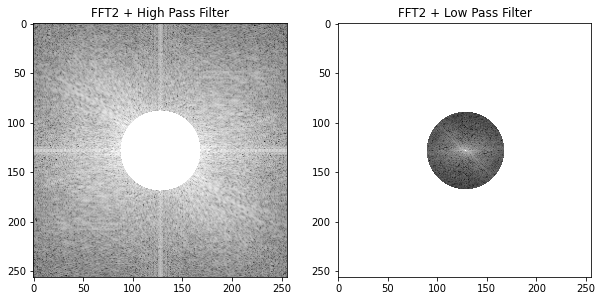

In [67]:
# Display the magnitude spectrum of the filtered image
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,2,1), plt.imshow(magnitude_spectrum_hp, cmap='gray')
plt.title('FFT2 + High Pass Filter')
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum_lp, cmap='gray')
plt.title('FFT2 + Low Pass Filter')
plt.show()


    Performing inverse fourier transformation on filtered image

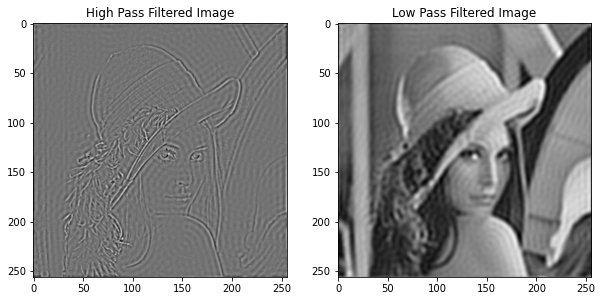

In [49]:
# Perform inverse Fourier transformation on the filtered image
img_back_hp = np.fft.ifft2(np.fft.ifftshift(fshift_hp)).real
img_back_lp = np.fft.ifft2(np.fft.ifftshift(fshift_lp)).real

# Display the original image, high pass filtered image, and low pass filtered image
fig = plt.figure(figsize=(10, 8))
plt.subplot(1,2,1),plt.imshow(img_back_hp, cmap='gray')
plt.title('High Pass Filtered Image')
plt.subplot(1,2,2),plt.imshow(img_back_lp, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.show()
